In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv("Algerian_forest_fire_CLEAN_DATASET.csv")

In [4]:
df

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='str')

In [5]:
df.drop(['day', 'month', 'year'],axis =1,inplace = True)

In [6]:
df.drop(["Unnamed: 0"],axis=1,inplace =True)

In [7]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [7]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df.info()
df["Classes"].unique()

<class 'pandas.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    str    
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(4), str(1)
memory usage: 22.9 KB


<StringArray>
[  'not fire   ',       'fire   ',          'fire',         'fire ',
      'not fire',     'not fire ', 'not fire     ',  'not fire    ']
Length: 8, dtype: str

In [8]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),1,0)

In [9]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [11]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,1,1


In [13]:
df["Classes"].unique()

array([1, 0])

In [12]:
df["Classes"] = df["Classes"].astype(int)

In [13]:
df["Classes"].dtype

dtype('int64')

In [14]:
X = df.drop(["FWI"],axis=1)
y= df["FWI"]

In [15]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,0,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,1,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,1,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,1,1


In [18]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [16]:
# Trian test split
from sklearn.model_selection import train_test_split


X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size=0.25,random_state =42)

col= [X_train,x_test,Y_train,y_test]
for i in col:
    print(i.shape)

(182, 11)
(61, 11)
(182,)
(61,)


In [17]:
# feature Selection

df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,-0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,-0.719216,0.197102


In [18]:
df.describe

<bound method NDFrame.describe of      Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Classes  \
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5        1   
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4        1   
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1        1   
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0        1   
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5        1   
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...      ...   
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5        0   
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0        1   
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2        1   
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7        1   
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5        1   

     Region  
0         0  
1         0  

In [ ]:
# negatively corelated is an impoortant feature 
# but hightly correlate is not an important so we try ti remove it


<Axes: >

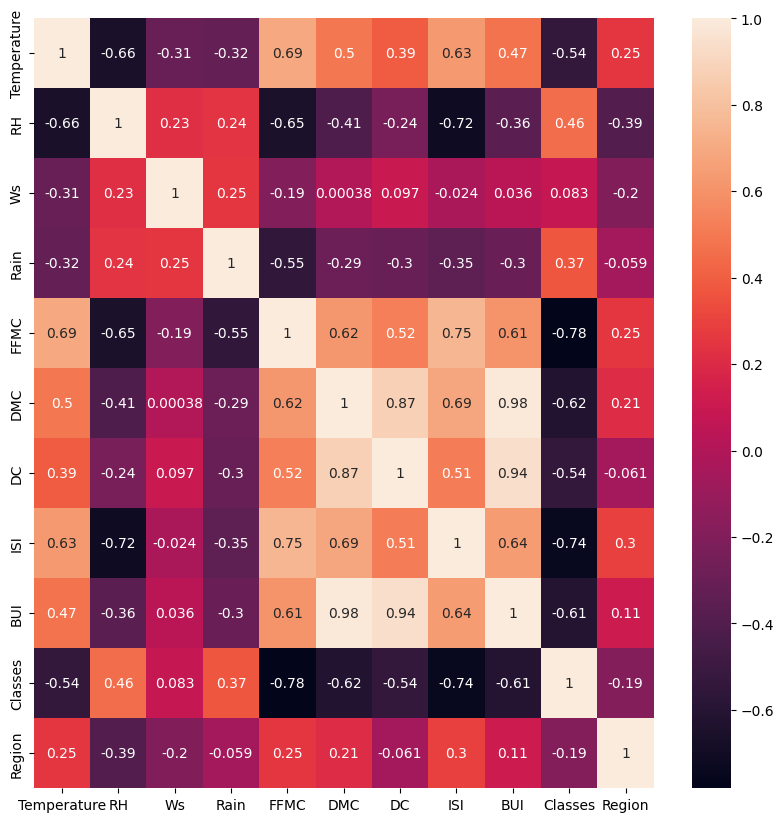

In [19]:
## checking for multicolinerity

plt.figure(figsize =(10,10))
corr = X_train.corr()
sns.heatmap(corr,annot = True)

In [20]:
def Correlation(data,THRESOLD):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > THRESOLD:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [21]:
corr_Feature = Correlation(X_train,0.85) #thresold value io set by domain experts or the person has domain knowledg 

In [22]:
## drop the the feature is more the thresold

X_train.drop(corr_Feature,axis =1,inplace =True)
x_test.drop(corr_Feature,axis =1,inplace =True)


In [23]:
col= [X_train,x_test,Y_train,y_test]
for i in col:
    print(i.shape)

(182, 9)
(61, 9)
(182,)
(61,)


In [24]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,1,0
141,31,72,14,0.2,60.2,3.8,0.8,1,1
192,40,31,15,0.0,94.2,22.5,16.6,0,1
68,32,60,18,0.3,77.1,11.3,2.2,1,0
119,32,47,14,0.7,77.5,7.1,1.8,1,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,1,0
14,28,80,17,3.1,49.4,3.0,0.4,1,0
92,25,76,17,7.2,46.0,1.3,0.2,1,0
179,34,59,16,0.0,88.1,19.5,7.4,0,1


In [25]:
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,0,0
6,33,54,13,0.0,88.2,9.9,6.4,0,0
152,28,58,18,2.2,63.7,3.2,1.2,1,1
232,34,58,13,0.2,79.5,18.7,2.1,1,1
238,30,65,14,0.0,85.4,16.0,4.5,0,1
...,...,...,...,...,...,...,...,...,...
162,34,56,15,2.9,74.8,7.1,1.6,1,1
178,33,57,16,0.0,87.5,15.7,6.7,0,1
224,31,72,14,0.0,84.2,8.3,3.8,0,1
230,36,33,13,0.1,90.6,25.8,9.0,0,1


In [26]:
Y_train

97      0.9
141     0.3
192    21.6
68      2.6
119     0.9
       ... 
106     0.0
14      0.1
92      0.1
179    10.9
102     0.3
Name: FWI, Length: 182, dtype: float64

In [27]:
y_test

24      8.4
6       7.2
152     0.5
232     3.8
238     6.5
       ... 
162     0.8
178     9.0
224     3.9
230    15.4
154     5.2
Name: FWI, Length: 61, dtype: float64

In [28]:
# Feature Scaling and Standardization mean/std and data point - mean / std -> for refer check z -score formaula  for an example

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
x_test_scaled = scaler.transform(x_test)

In [29]:
X_train_scaled


array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
        -0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
         1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
        -0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
         1.10431526, -0.98907071]], shape=(182, 9))

In [30]:
x_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01, -9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01, -9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01,  1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01,  1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02, -9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

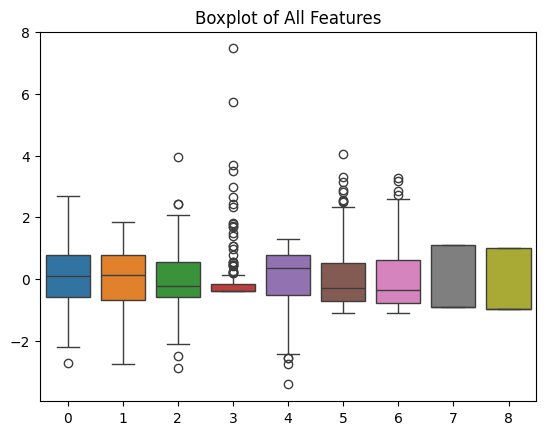

In [31]:
#Box plot to understand the effect of standard scaler effect

sns.boxplot(data=X_train_scaled)
plt.xticks(rotation=0)
plt.title("Boxplot of All Features")
plt.show()


#Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
linReg = LinearRegression()

In [33]:
linReg.fit(X_train_scaled,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [34]:
y_pred = linReg.predict(x_test_scaled)

In [35]:

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2score  = r2_score(y_test,y_pred)

# val = [mse,rmse,mae,SRC]

# for i in val:
#     print(val[i], i)
print("MSE      :",mse)
print("RMSE     :",rmse)
print("MAE      :",mae)
print("r2_score : ",r2score*100)

MSE      : 0.6742766873791585
RMSE     : 0.8211435242265255
MAE      : 0.5468236465249974
r2_score :  98.47657384266951


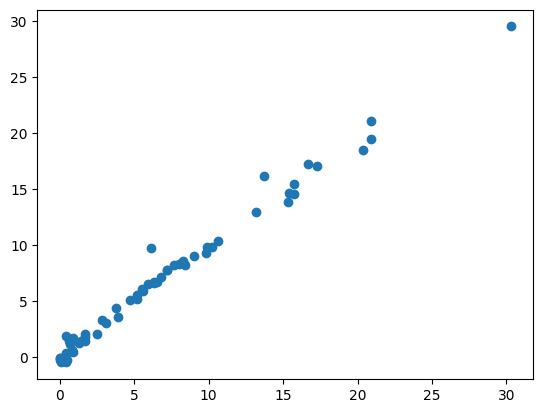

In [36]:
# X_train_scaled
# x_test_scaled
plt.scatter(y_test,y_pred)


In [37]:
## lasso regression

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lasso = Lasso()

lasso.fit(X_train_scaled,Y_train)
y_pred = lasso.predict(x_test_scaled)

In [38]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2score  = r2_score(y_test,y_pred)

# val = [mse,rmse,mae,SRC]

# for i in val:
#     print(val[i], i)
print("MSE      :",mse)
print("RMSE     :",rmse)
print("MAE      :",mae)
print("r2_score : ",r2score*100)

MSE      : 2.248345891897476
RMSE     : 1.499448529259166
MAE      : 1.1331759949144087
r2_score :  94.92020263112389


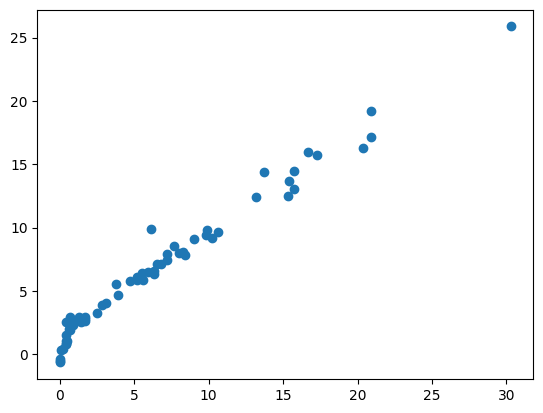

In [39]:
# X_train_scaled
# x_test_scaled
plt.scatter(y_test,y_pred)


In [40]:
#cross validation

from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,Y_train)

,"eps eps: float, default=1e-3Length of the path. ``eps=1e-3`` means that``alpha_min / alpha_max = 1e-3``.",0.001
,"n_alphas n_alphas: int, default=100Number of alphas along the regularization path... deprecated:: 1.7 `n_alphas` was deprecated in 1.7 and will be removed in 1.9. Use `alphas` instead.",'deprecated'
,"alphas alphas: array-like or int, default=NoneValues of alphas to test along the regularization path.If int, `alphas` values are generated automatically.If array-like, list of alpha values to use... versionchanged:: 1.7 `alphas` accepts an integer value which removes the need to pass `n_alphas`... deprecated:: 1.7 `alphas=None` was deprecated in 1.7 and will be removed in 1.9, at which point the default value will be set to 100.",'warn'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: 'auto', bool or array-like of shape (n_features, n_features), default='auto'Whether to use a precomputed Gram matrix to speed upcalculations. If set to ``'auto'`` let us decide. The Grammatrix can also be passed as argument.",'auto'
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``.",0.0001
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"cv cv: int, cross-validation generator or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- int, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For int/None inputs, :class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: bool or int, default=FalseAmount of verbosity.",False
,"n_jobs n_jobs: int, default=NoneNumber of CPUs to use during the cross validation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [41]:
lassocv.predict(x_test_scaled)

array([ 8.16830389,  7.68147002, -0.23809698,  4.78348068,  6.80056553,
        1.8240148 ,  2.24891284,  7.65375452,  2.01837075,  3.43551694,
        0.65763521, 10.0012828 ,  9.37421682, 16.97541786, 18.25005429,
        1.67532586,  1.63417641, -0.73141894,  7.28096417,  3.12985293,
        2.00263648,  0.1674232 ,  6.47597673,  0.1299297 , 20.97550028,
        5.13544945,  5.85790118,  9.7488384 , -0.87894886,  9.92467295,
        6.71279503, -0.29032334, 10.29690182, 14.41231719,  1.75785569,
        0.89446894,  2.03030842,  5.98752495, -0.66008033, -0.60143063,
        6.46018173,  2.13349411,  8.46440838, -0.93165221, 15.40314151,
        8.32213695,  8.49346616,  1.4463523 , 13.02801863,  1.22072717,
       29.04392853,  5.51377627, 17.14332712, 19.2525866 , 13.68873198,
       16.02465131,  1.04280502,  9.09699018,  3.86335958, 14.44065137,
        5.24516066])

In [42]:
lassocv.alpha_

np.float64(0.06582808719529475)

In [43]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [44]:
# Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
ridge = Ridge()

ridge.fit(X_train_scaled,Y_train)
y_pred = ridge.predict(x_test_scaled)

In [45]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2score  = r2_score(y_test,y_pred)

# val = [mse,rmse,mae,SRC]

# for i in val:
#     print(val[i], i)
print("MSE      :",mse)
print("RMSE     :",rmse)
print("MAE      :",mae)
print("r2_score : ",r2score*100)

MSE      : 0.6949198918152091
RMSE     : 0.8336185529456558
MAE      : 0.564230534010571
r2_score :  98.42993364555512


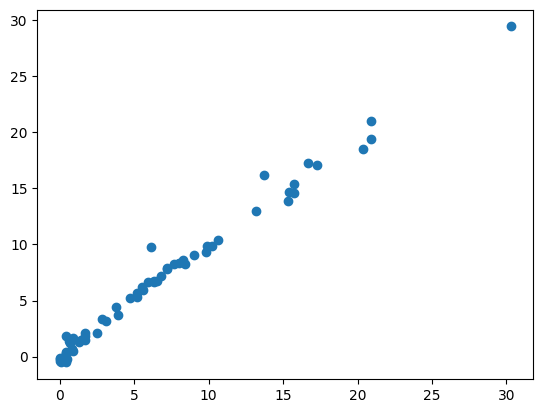

In [46]:
# X_train_scaled
# x_test_scaled
plt.scatter(y_test,y_pred)


In [47]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=5) # if we dont give anything it use Loocv
ridge.fit(X_train_scaled,Y_train)

y_pred = ridge.predict(x_test_scaled)
r2score  = r2_score(y_test,y_pred)
print("MSE      :",mse)
print("RMSE     :",rmse)
print("MAE      :",mae)
print("r2_score : ",r2score*100)

MSE      : 0.6949198918152091
RMSE     : 0.8336185529456558
MAE      : 0.564230534010571
r2_score :  98.42993364555512


In [48]:
## Elastic net regression

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
elasticNet = ElasticNet()

elasticNet.fit(X_train_scaled,Y_train)
y_pred = elasticNet.predict(x_test_scaled)

In [49]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2score  = r2_score(y_test,y_pred)

# val = [mse,rmse,mae,SRC]

# for i in val:
#     print(val[i], i)
print("MSE      :",mse)
print("RMSE     :",rmse)
print("MAE      :",mae)
print("r2_score : ",r2score*100)

MSE      : 5.517251101025223
RMSE     : 2.3488829474933874
MAE      : 1.8822353634895999
r2_score :  87.53460589519703


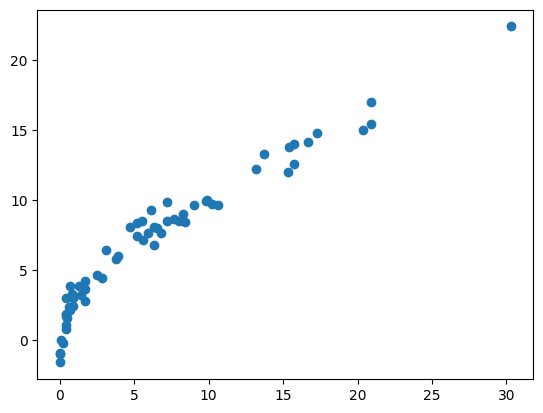

In [50]:
# X_train_scaled
# x_test_scaled
plt.scatter(y_test,y_pred)


In [51]:
from sklearn.linear_model import ElasticNetCV

elasticCV = ElasticNetCV()

elasticCV.fit(X_train_scaled,Y_train)
y_pred = elasticCV.predict(x_test_scaled)


mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2score  = r2_score(y_test,y_pred)

print("MSE      :",mse)
print("RMSE     :",rmse)
print("MAE      :",mae)
print("r2_score : ",r2score*100)

MSE      : 0.8222830416276267
RMSE     : 0.9067982364493364
MAE      : 0.6575946731430902
r2_score :  98.14217587854941


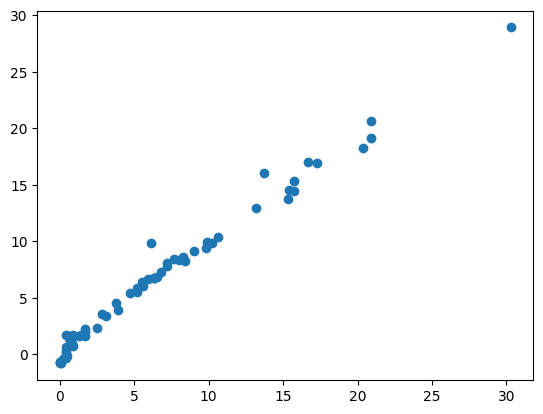

In [52]:
plt.scatter(y_test,y_pred)

In [53]:
parameter = [lasso,ridge,elasticNet]

for i in parameter:
    print(i.get_params(),"\n")
print(elasticCV.alphas_)

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False} 

{'alpha_per_target': False, 'alphas': (0.1, 1.0, 10.0), 'cv': 5, 'fit_intercept': True, 'gcv_mode': None, 'scoring': None, 'store_cv_results': False} 

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False} 

[14.11706004 13.16561744 12.27829889 11.45078264 10.67903821  9.95930678
  9.28808283  8.66209714  8.07830078  7.53385034  7.02609405  6.55255882
  6.11093829  5.6990815   5.31498248  4.95677045  4.62270071  4.31114616
  4.02058933  3.74961507  3.49690356  3.26122397  3.04142839  2.83644629
  2.64527931  2.46699633  2.30072904  2.1456676   2.00105679  1.86619226
  1.74041714  1.62311885  1.51372607  1.411706    1.31656174  1.22782989
  1

In [54]:
scaler

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [55]:
ridge

,"alphas alphas: array-like of shape (n_alphas,), default=(0.1, 1.0, 10.0)Array of alpha values to try.Regularization strength; must be a positive float. Regularizationimproves the conditioning of the problem and reduces the variance ofthe estimates. Larger values specify stronger regularization.Alpha corresponds to ``1 / (2C)`` in other linear models such as:class:`~sklearn.linear_model.LogisticRegression` or:class:`~sklearn.svm.LinearSVC`.If using Leave-One-Out cross-validation, alphas must be strictly positive.","(0.1, ...)"
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"scoring scoring: str, callable, default=NoneThe scoring method to use for cross-validation. Options:- str: see :ref:`scoring_string_names` for options.- callable: a scorer callable object (e.g., function) with signature ``scorer(estimator, X, y)``. See :ref:`scoring_callable` for details.- `None`: negative :ref:`mean squared error ` if cv is None (i.e. when using leave-one-out cross-validation), or :ref:`coefficient of determination ` (:math:`R^2`) otherwise.",None
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the efficient Leave-One-Out cross-validation- integer, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if ``y`` is binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used, else,:class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.",5
,"gcv_mode gcv_mode: {'auto', 'svd', 'eigen'}, default='auto'Flag indicating which strategy to use when performingLeave-One-Out Cross-Validation. Options are:: 'auto' : use 'svd' if n_samples > n_features, otherwise use 'eigen' 'svd' : force use of singular value decomposition of X when X is dense, eigenvalue decomposition of X^T.X when X is sparse. 'eigen' : force computation via eigendecomposition of X.X^TThe 'auto' mode is the default and is intended to pick the cheaperoption of the two depending on the shape of the training data.",None
,"store_cv_results store_cv_results: bool, default=FalseFlag indicating if the cross-validation values corresponding toeach alpha should be stored in the ``cv_results_`` attribute (seebelow). This flag is only compatible with ``cv=None`` (i.e. usingLeave-One-Out Cross-Validation)... versionchanged:: 1.5 Parameter name changed from `store_cv_values` to `store_cv_results`.",False
,"alpha_per_target alpha_per_target: bool, default=FalseFlag indicating whether to optimize the alpha value (picked from the`alphas` parameter list) for each target separately (for multi-outputsettings: multiple prediction targets). When set to `True`, afterfitting, the `alpha_` attribute will contain a value for each target.When set to `False`, a single alpha is used for all targets... versionadded:: 0.24",False


In [56]:
import pickle

pickle.dump(scaler,open("scaler.pkl",'wb'))
pickle.dump(ridge,open("ridge.pkl","wb"))